<a href="https://colab.research.google.com/github/Guldanika/machine-learning-zoomcamp-2025/blob/main/Trees_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In this homework, we continue using the fuel efficiency dataset. Download it from here.

You can do it with wget:

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-09 23:09:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-11-09 23:09:41 (19.3 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



**The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').**


Preparing the dataset
# Preparation:

- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.


# Question 1
 Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.


Train a model with max_depth=1.

**Which feature is used for splitting the data?**

- 'vehicle_weight'
- 'model_year'
- 'origin'
- 'fuel_type'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Load dataset
df = pd.read_csv('car_fuel_efficiency.csv')



In [3]:
# Fill missing values with zeros
df = df.fillna(0)



In [4]:
# Target
y = df.fuel_efficiency_mpg
X = df.drop('fuel_efficiency_mpg', axis=1)


#Step 2. Split into Train / Validation / Test

**We’ll first do 60% / 40%, then split the remaining 40% equally into 20% / 20%.**

In [5]:
# 60% train, 40% temp
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# 50% of temp goes to val (20% total), 50% to test (20% total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1
)



#Step 3. Apply DictVectorizer

**We’ll convert the DataFrames into dictionaries first, then into sparse matrices.**

In [6]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

train_dicts = X_train_full.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')


X_train_dv = dv.fit_transform(train_dicts)
X_val_dv = dv.transform(val_dicts)


🌳 Step 4. Train a Decision Tree Regressor (max_depth=1)

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train_dv, y_train_full)





DecisionTreeRegressor(max_depth=1, random_state=1)

#Step 5. Identify the Splitting Feature

**We can check which feature is used for the first split (the root node):**

In [11]:
feature_index = dt.tree_.feature[0]
dv.feature_names_[feature_index]


'vehicle_weight'

#Question 2

**Train a random forest regressor with these parameters:**

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)

**What's the RMSE of this model on the validation data?**

- 0.045
- 0.45
- 4.5
- 45.0


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# 7. Train Random Forest
rf = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train_dv, y_train_full)



RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [15]:
# 8. Predict and evaluate
y_pred = rf.predict(X_val_dv)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 0.4602815367032659


#Question 3

**Now let's experiment with the n_estimators parameter**


Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.

Evaluate the model on the validation dataset.

**After which value of n_estimators does RMSE stop improving?**

Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in your answer.



In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )
    rf.fit(X_train_dv, y_train_full)
    y_pred = rf.predict(X_val_dv)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n, rmse))

scores_df = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
scores_df


,n_estimators,rmse
0,10,0.460282
1,20,0.446157
2,30,0.439778
3,40,0.438394
4,50,0.437170
5,60,0.435591
6,70,0.436112
7,80,0.436055
8,90,0.435410
9,100,0.435277


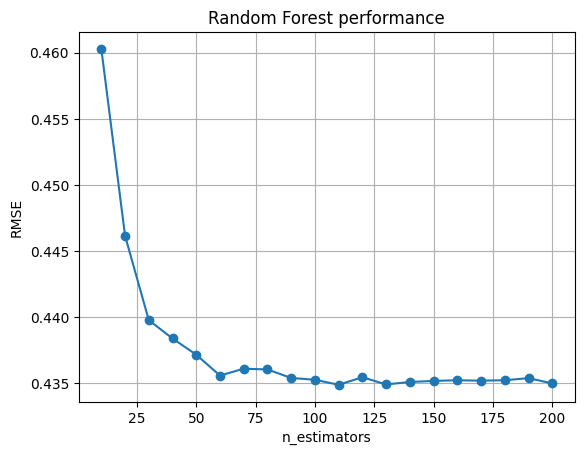

,n_estimators,rmse
0,10,0.460282
1,20,0.446157
2,30,0.439778
3,40,0.438394
4,50,0.437170
5,60,0.435591
6,70,0.436112
7,80,0.436055
8,90,0.435410
9,100,0.435277


In [17]:
#Step 3. Observe RMSE Change

import matplotlib.pyplot as plt

plt.plot(scores_df.n_estimators, scores_df.rmse, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Random Forest performance')
plt.grid(True)
plt.show()

scores_df


#Question 4

**Let's select the best max_depth:**

Try different values of max_depth: [10, 15, 20, 25]

For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE

Fix the random seed: random_state=1

**What's the best max_depth, using the mean RMSE?**

* 10
* 15
* 20
* 25


In [22]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)
# (0.25 of 0.8 = 0.2 overall → 60/20/20)

# 5. Vectorize
dv = DictVectorizer(sparse=True)

X_train_dicts = X_train.to_dict(orient='records')
X_val_dicts = X_val.to_dict(orient='records')

X_train = dv.fit_transform(X_train_dicts)
X_val = dv.transform(X_val_dicts)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

max_depth_values = [10, 15, 20, 25]
n_estimators_values = range(10, 201, 10)

rmse_scores = {}

for d in max_depth_values:
    scores = []
    for n in n_estimators_values:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append(rmse)
    rmse_scores[d] = np.mean(scores)

rmse_scores


{10: np.float64(0.44180786093233565),
 15: np.float64(0.44541664456381075),
 20: np.float64(0.44625292424422536),
 25: np.float64(0.44590993626161624)}

#Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split.
When doing it, we can calculate "gain" - the reduction in impurity before and after the split.
This gain is quite useful in understanding what are the important features for tree-based models.


In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)

Get the feature importance information from this model

**What's the most important feature (among these 4)?**

* vehicle_weight
* horsepower
* acceleration
* engine_displacement


In [24]:
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [25]:
import pandas as pd

importances = rf.feature_importances_
features = dv.feature_names_

df_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

df_importances.head(10)


,feature,importance
13,vehicle_weight,0.959150
6,horsepower,0.015998
0,acceleration,0.011480
3,engine_displacement,0.003273
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635
12,origin=USA,0.000540
11,origin=Europe,0.000519
10,origin=Asia,0.000462


**the most important feature : vehicle_weight	0.959150**

#Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost

Create DMatrix for train and validation

Create a watchlist

Train a model with these parameters for 100 rounds:




```
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

```



Now change eta from 0.3 to 0.1.

**Which eta leads to the best RMSE score on the validation dataset?**

- 0.3
- 0.1
- Both give equal value


In [26]:
!pip install xgboost
import xgboost as xgb

In [27]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)


In [28]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [29]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


In [30]:
model_03 = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=watchlist,
)


[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35353
[2]	train-rmse:0.98120	val-rmse:1.01316
[3]	train-rmse:0.75443	val-rmse:0.78667
[4]	train-rmse:0.60680	val-rmse:0.64318
[5]	train-rmse:0.51381	val-rmse:0.55664
[6]	train-rmse:0.45470	val-rmse:0.50321
[7]	train-rmse:0.41881	val-rmse:0.47254
[8]	train-rmse:0.39534	val-rmse:0.45509
[9]	train-rmse:0.38038	val-rmse:0.44564
[10]	train-rmse:0.37115	val-rmse:0.43896
[11]	train-rmse:0.36361	val-rmse:0.43594
[12]	train-rmse:0.35850	val-rmse:0.43558
[13]	train-rmse:0.35365	val-rmse:0.43394
[14]	train-rmse:0.35025	val-rmse:0.43349
[15]	train-rmse:0.34666	val-rmse:0.43362
[16]	train-rmse:0.34459	val-rmse:0.43378
[17]	train-rmse:0.34128	val-rmse:0.43405
[18]	train-rmse:0.33822	val-rmse:0.43391
[19]	train-rmse:0.33709	val-rmse:0.43374
[20]	train-rmse:0.33553	val-rmse:0.43376
[21]	train-rmse:0.33243	val-rmse:0.43453
[22]	train-rmse:0.33031	val-rmse:0.43510
[23]	train-rmse:0.32815	val-rmse:0.43601
[24]	train-rmse:0.32670	va

#Change eta to 0.1

In [31]:
xgb_params['eta'] = 0.1

model_01 = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=watchlist,
)


[0]	train-rmse:2.28944	val-rmse:2.34561
[1]	train-rmse:2.07396	val-rmse:2.12434
[2]	train-rmse:1.88066	val-rmse:1.92597
[3]	train-rmse:1.70730	val-rmse:1.74987
[4]	train-rmse:1.55163	val-rmse:1.59059
[5]	train-rmse:1.41247	val-rmse:1.44988
[6]	train-rmse:1.28796	val-rmse:1.32329
[7]	train-rmse:1.17660	val-rmse:1.20930
[8]	train-rmse:1.07736	val-rmse:1.10830
[9]	train-rmse:0.98883	val-rmse:1.02009
[10]	train-rmse:0.91008	val-rmse:0.94062
[11]	train-rmse:0.84030	val-rmse:0.87100
[12]	train-rmse:0.77874	val-rmse:0.80916
[13]	train-rmse:0.72417	val-rmse:0.75465
[14]	train-rmse:0.67626	val-rmse:0.70780
[15]	train-rmse:0.63402	val-rmse:0.66672
[16]	train-rmse:0.59690	val-rmse:0.63062
[17]	train-rmse:0.56447	val-rmse:0.60016
[18]	train-rmse:0.53619	val-rmse:0.57383
[19]	train-rmse:0.51138	val-rmse:0.55044
[20]	train-rmse:0.48983	val-rmse:0.53064
[21]	train-rmse:0.47135	val-rmse:0.51451
[22]	train-rmse:0.45501	val-rmse:0.49998
[23]	train-rmse:0.44120	val-rmse:0.48790
[24]	train-rmse:0.42929	va

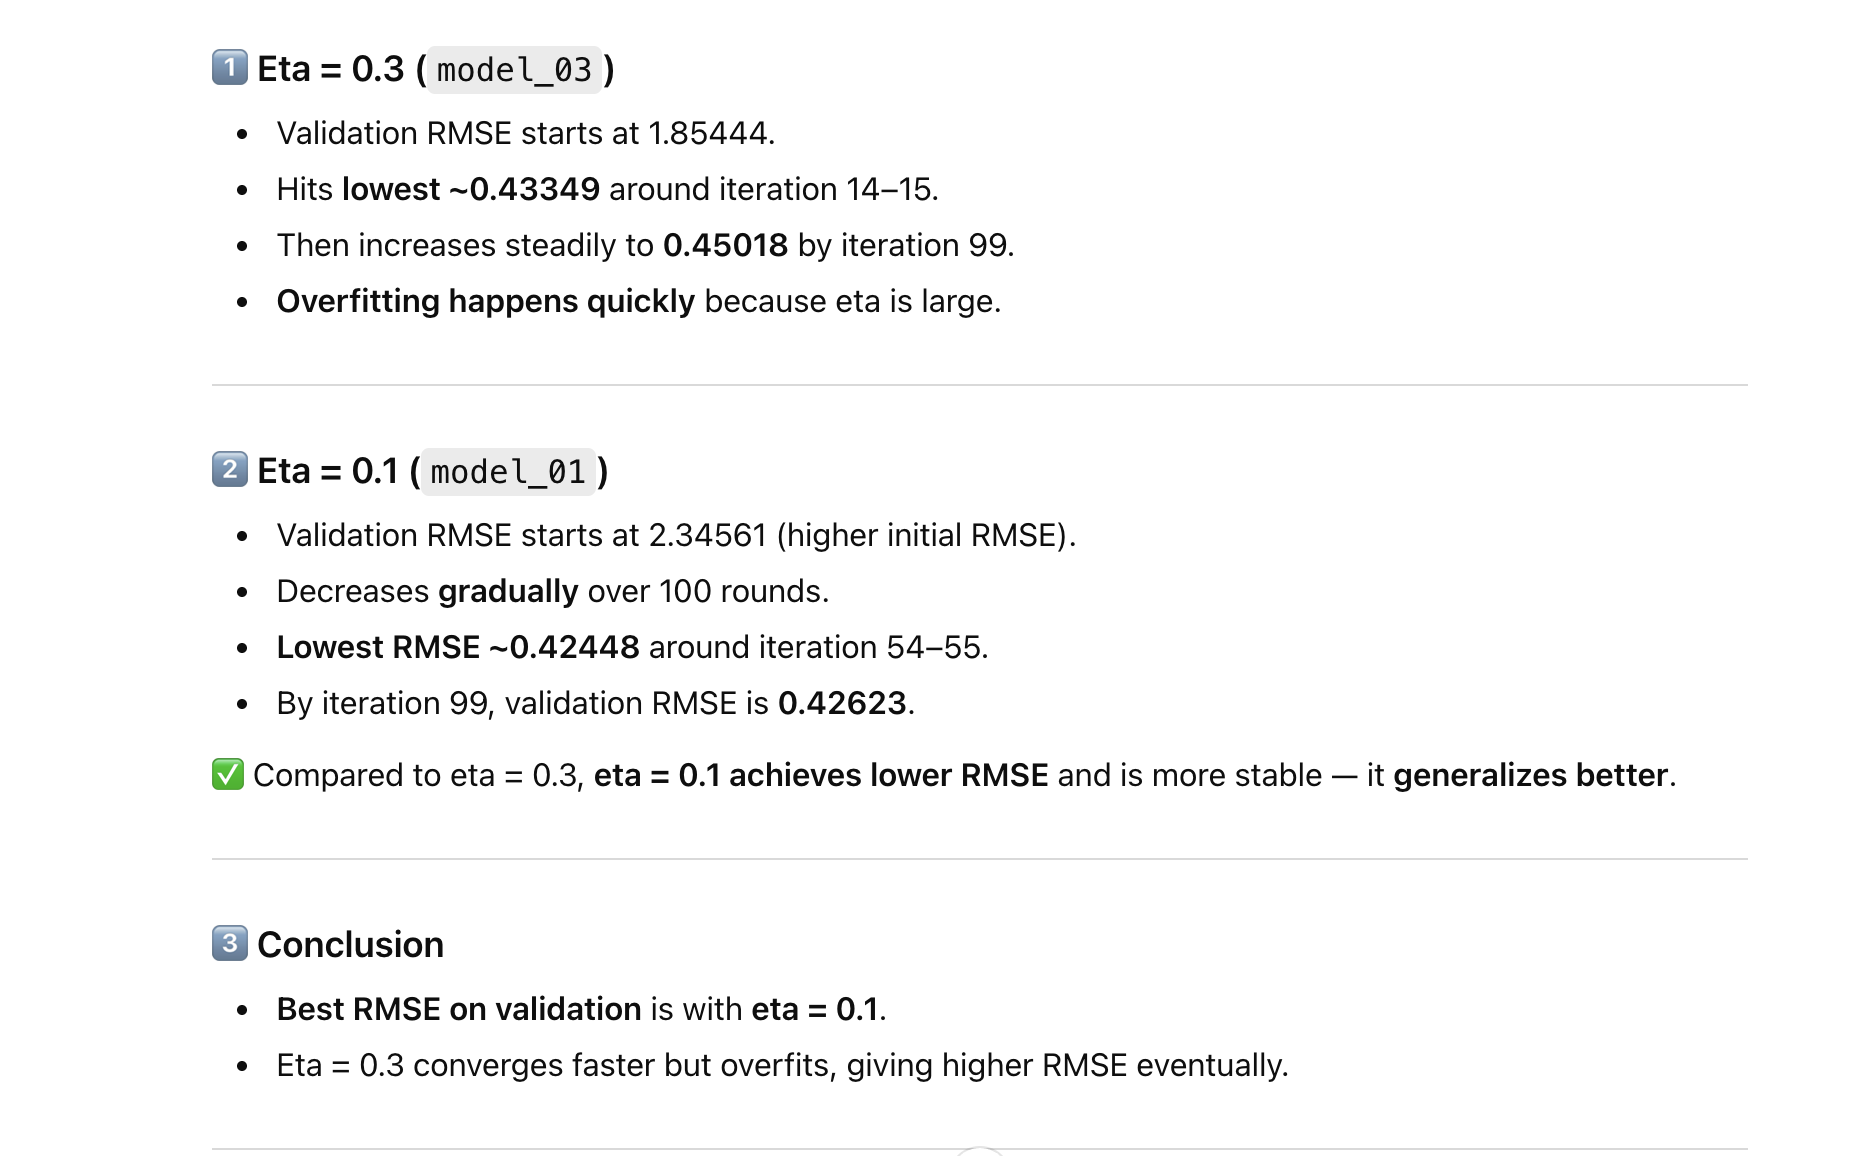